In [10]:
import pandas as pd
train_data = pd.read_csv('train.csv', sep='\t', header=None)
test_data = pd.read_csv('test.csv', sep='\t', header=None)
train_data.columns = ["text","label"]
test_data.columns = ["text"]

In [12]:
train_data["label"].value_counts()

FilmTele-Play            1355
Video-Play               1334
Music-Play               1304
Radio-Listen             1285
Alarm-Update             1264
Weather-Query            1229
Travel-Query             1220
HomeAppliance-Control    1215
Calendar-Query           1214
TVProgram-Play            240
Audio-Play                226
Other                     214
Name: label, dtype: int64

In [13]:
train_data["text"].apply(len).describe()

count    12100.000000
mean        15.138678
std          4.872583
min          4.000000
25%         12.000000
50%         15.000000
75%         18.000000
max         54.000000
Name: text, dtype: float64

In [14]:
test_data["text"].apply(len).describe()

count    3000.000000
mean       15.884333
std         4.993990
min         5.000000
25%        12.000000
50%        15.000000
75%        19.000000
max        39.000000
Name: text, dtype: float64

In [22]:
from wordcloud import WordCloud  
import matplotlib.pyplot as plt
import jieba

# 读取中文停用词
cn_stopwords = ' '.join(pd.read_csv('https://mirror.coggle.club/stopwords/baidu_stopwords.txt', header=None)[0])

# 中文字体，https://mirror.coggle.club/STHeiti-Light.ttc
# 如果不设置，云图不能展示中文
wordcloud = WordCloud(background_color = 'white', max_words = 1000, font_path = 'STHeiti-Light.ttc')

([], [])

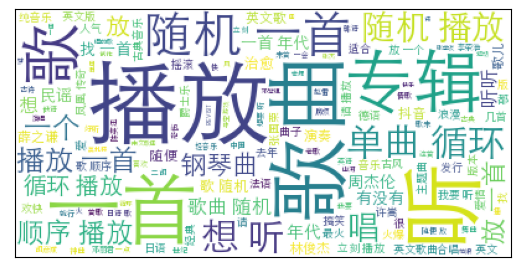

In [24]:
# Music-Play
content = ''.join(train_data[train_data["label"] == 'Music-Play']["text"])
words = jieba.lcut(content)
words = [x for x in words if x not in cn_stopwords]
wordcloud.generate(' '.join(words))
plt.imshow(wordcloud)
plt.xticks([]); plt.yticks([])

([], [])

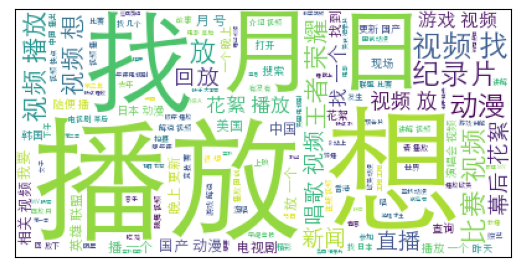

In [26]:
# Video-Play
content = ''.join(train_data[train_data["label"] == 'Video-Play']["text"])
words = jieba.lcut(content)
words = [x for x in words if x not in cn_stopwords]
wordcloud.generate(' '.join(words))
plt.imshow(wordcloud)
plt.xticks([]); plt.yticks([])

([], [])

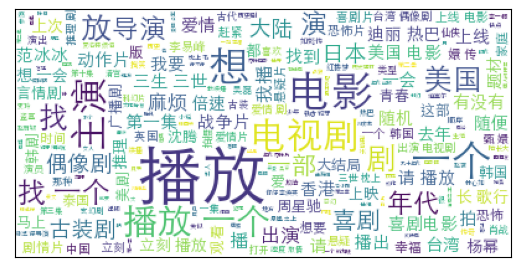

In [27]:
# FilmTele-Play
content = ''.join(train_data[train_data["label"] == 'FilmTele-Play']["text"])
words = jieba.lcut(content)
words = [x for x in words if x not in cn_stopwords]
wordcloud.generate(' '.join(words))
plt.imshow(wordcloud)
plt.xticks([]); plt.yticks([])

([], [])

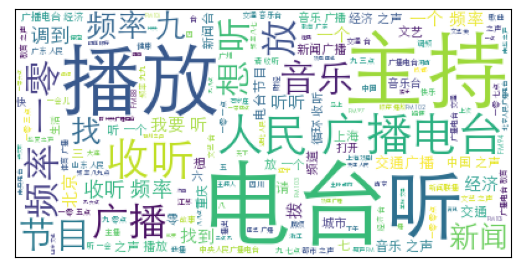

In [28]:
# Radio-Listen
content = ''.join(train_data[train_data["label"] == 'Radio-Listen']["text"])
words = jieba.lcut(content)
words = [x for x in words if x not in cn_stopwords]
wordcloud.generate(' '.join(words))
plt.imshow(wordcloud)
plt.xticks([]); plt.yticks([])

In [31]:
train_data

,text,label
0,还有双鸭山到淮阴的汽车票吗13号的,Travel-Query
1,从这里怎么回家,Travel-Query
2,随便播放一首专辑阁楼里的佛里的歌,Music-Play
3,给看一下墓王之王嘛,FilmTele-Play
4,我想看挑战两把s686打突变团竞的游戏视频,Video-Play
...,...,...
12095,一千六百五十三加三千一百六十五点六五等于几,Calendar-Query
12096,稍小点客厅空调风速,HomeAppliance-Control
12097,黎耀祥陈豪邓萃雯畲诗曼陈法拉敖嘉年杨怡马浚伟等到场出席,Radio-Listen
12098,百事盖世群星星光演唱会有谁,Video-Play


In [36]:
import jieba
def cut_by_jieba(sentence):
    segs = list(jieba.cut(sentence))
    filtered_segs = [x for x in segs if x not in cn_stopwords]
    return filtered_segs

In [37]:
train_data["text_segs"] = train_data["text"].apply(cut_by_jieba)

In [38]:
test_data["text_segs"] = test_data["text"].apply(cut_by_jieba)

In [49]:
#tfidf+LR
train_corpus = []
test_corpus = []
for i in range(len(train_data)):
    train_corpus.append(" ".join(train_data.iloc[i]["text_segs"]))
for i in range(len(test_data)):
    test_corpus.append(" ".join(test_data.iloc[i]["text_segs"]))

In [51]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
pipline = make_pipeline(
    TfidfVectorizer(analyzer='char'),
    LogisticRegression()
)
pipline.fit(
    train_corpus,
    train_data['label'].tolist()
)

G:\anaconda\envs\paddle\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='char')),
                ('logisticregression', LogisticRegression())])

In [52]:
test_data['label'] = pipline.predict(test_corpus)

In [53]:
test_data

,text,text_segs,label
0,回放CCTV2的消费主张,"[回放, CCTV2, 消费]",TVProgram-Play
1,给我打开玩具房的灯,"[打开, 玩具, 房, 灯]",HomeAppliance-Control
2,循环播放赵本山的小品相亲来听,"[循环, 播放, 赵本山, 小品, 相亲, 听]",Audio-Play
3,15号上午10点带孩子去海洋馆的行程帮我制定下。,"[15, 号, 上午, 10, 点带, 孩子, 海洋馆, 行程, 制定, 。]",Alarm-Update
4,把智能扫地机器人关掉,"[智能, 扫地, 机器人, 关掉]",HomeAppliance-Control
...,...,...,...
2995,是否能找一首2019年的抖音歌曲播放下呢,"[找, 一首, 2019, 抖音, 歌曲, 播放]",Music-Play
2996,下午三点有哪个台放大话西游吗帮我看下,"[下午, 三点, 台放, 大话西游]",Radio-Listen
2997,随机播放一首古筝弹奏的曲子可以吗,"[随机, 播放, 一首, 古筝, 弹奏, 曲子]",Music-Play
2998,美食纪录片螃蟹的征途给我找一下,"[美食, 纪录片, 螃蟹, 征途, 找]",Video-Play


In [54]:
#LR输出结果文件
#在https://competition.coggle.club/上的结果是0.7567
with open("results\\LR.txt","w") as f:
    f.write("ID,Target\n")
    for i in range(len(test_data)):
        f.write(str(i+1)+","+test_data.iloc[i]["label"]+"\n")

In [55]:
#tfidf+SVM
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
pipline = make_pipeline(
    TfidfVectorizer(analyzer='char'),
    LinearSVC(C=1.0)
)
pipline.fit(
    train_corpus,
    train_data['label'].tolist()
)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='char')),
                ('linearsvc', LinearSVC())])

In [56]:
test_data['label_svm'] = pipline.predict(test_corpus)

In [59]:
train_data

,text,label,text_segs
0,还有双鸭山到淮阴的汽车票吗13号的,Travel-Query,"[双鸭山, 淮阴, 汽车票, 13, 号]"
1,从这里怎么回家,Travel-Query,[回家]
2,随便播放一首专辑阁楼里的佛里的歌,Music-Play,"[随便, 播放, 一首, 专辑, 阁楼, 佛里, 歌]"
3,给看一下墓王之王嘛,FilmTele-Play,"[墓, 王之王]"
4,我想看挑战两把s686打突变团竞的游戏视频,Video-Play,"[想, 挑战, 两把, s686, 突变, 团, 竞, 游戏, 视频]"
...,...,...,...
12095,一千六百五十三加三千一百六十五点六五等于几,Calendar-Query,"[一千六百五十, 三加, 三千, 一百六十五, 六五, 等于]"
12096,稍小点客厅空调风速,HomeAppliance-Control,"[稍, 小点, 客厅, 空调, 风速]"
12097,黎耀祥陈豪邓萃雯畲诗曼陈法拉敖嘉年杨怡马浚伟等到场出席,Radio-Listen,"[黎耀祥, 陈豪, 邓萃雯, 畲诗曼, 陈, 法拉, 敖嘉年, 杨怡, 马浚伟, 到场, 出席]"
12098,百事盖世群星星光演唱会有谁,Video-Play,"[百事, 盖世, 群星, 星光, 演唱会]"


In [58]:
#SVM输出结果文件
#在https://competition.coggle.club/上的结果是0.7860
with open("results\\SVM.txt","w") as f:
    f.write("ID,Target\n")
    for i in range(len(test_data)):
        f.write(str(i+1)+","+test_data.iloc[i]["label_svm"]+"\n")

In [71]:
#tfidf+KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection  import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
k_range = range(1, 31)
vectorizer.fit_transform(train_corpus)
def seg_merge(segs):
    return " ".join(segs)
train_data["text_segs_str"] = train_data["text_segs"].apply(seg_merge)
train_tfidf = vectorizer.transform(train_data["text_segs_str"])

In [72]:
train_tfidf.shape

(12100, 2761)

In [76]:
from tqdm import tqdm
k_error = []
for k in tqdm(k_range):
    knn = KNeighborsClassifier(n_neighbors=k)
    #cv参数决定数据集划分比例，这里是按照5:1划分训练集和测试集
    scores = cross_val_score(knn, train_tfidf, train_data['label'].tolist(), cv=3, scoring='accuracy')
    k_error.append(1 - scores.mean())

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [01:28<00:00,  2.95s/it]


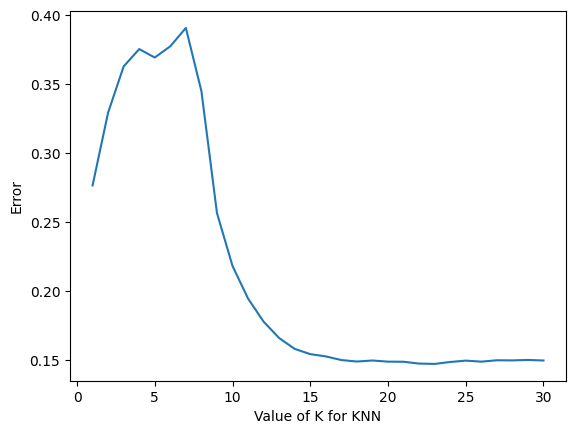

In [77]:
plt.plot(k_range, k_error)
plt.xlabel('Value of K for KNN')
plt.ylabel('Error')
plt.show()

In [78]:
#通过上图，选择K=15
pipline = make_pipeline(
    TfidfVectorizer(analyzer='char'),
    KNeighborsClassifier(n_neighbors=15)
)
pipline.fit(
    train_corpus,
    train_data['label'].tolist()
)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='char')),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=15))])

In [79]:
test_data['label_knn_15'] = pipline.predict(test_corpus)

In [80]:
#KNN输出结果文件
#在https://competition.coggle.club/上的结果是0.667000
with open("results\\KNN.txt","w") as f:
    f.write("ID,Target\n")
    for i in range(len(test_data)):
        f.write(str(i+1)+","+test_data.iloc[i]["label_knn_15"]+"\n")

In [81]:
#综上LR、SVM和KNN三种模型的结果，SVM的效果最好